In [1]:
import pandas as pd 
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', None)


In [2]:
df = pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06


In [4]:
df.drop(['TransactionID', 'CustomerID', 'TransactionTime'], axis=1, inplace=True)

In [5]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x : x.strftime("%d-%m-%Y") if not pd.isna(x) else np.nan)

In [6]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

In [7]:
df.isnull().sum()

CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
df.duplicated().sum()

43898

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df['CustGender'].isna()]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1034579,12-12-2050,NaN,MUMBAI,1091.50,2016-09-18,1168.00
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


In [11]:
df[(df['CustGender'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1033671,01-01-1800,NaN,NAVI MUMBAI,1294.44,2016-09-18,392.67
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


In [12]:
df[(df['CustLocation'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)


In [13]:
df[(df['CustAccountBalance'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
46189,01-01-1800,M,NEW DELHI,NaN,2016-08-03,1000.00
52180,01-01-1800,F,BANGALORE,NaN,2016-08-03,706.58
53026,01-01-1800,M,MUMBAI,NaN,2016-08-03,2094.00
60462,01-01-1800,M,NEW DELHI,NaN,2016-08-03,438.00
66458,01-01-1800,M,NAVI MUMBAI,NaN,2016-08-02,1134.00
...,...,...,...,...,...,...
979397,01-01-1800,M,NEW DELHI,NaN,2016-09-15,1000.00
998105,01-01-1800,M,HYDERABAD,NaN,2016-09-14,96.00
1014416,01-01-1800,F,JOGESHWARI WEST MUMBAI,NaN,2016-09-14,570.00
1033830,01-01-1800,M,MUMBAI,NaN,2016-09-18,382.69


In [14]:
df2 = df.copy()
print(f'Number of Missing Values (Before Treatment) : {df.isnull().sum().sum()}')

Number of Missing Values (Before Treatment) : 6626


In [15]:
df2.dropna(subset = ['CustGender'], inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5560


In [16]:
df2.drop(df2[(df2['CustAccountBalance'].isna()) & (df2['CustomerDOB'] == '01-01-1800')].index, 
         inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5395


In [17]:
df2.drop(df2[df2['CustomerDOB'] == '01-01-1800'].index, inplace=True)
df2['CustomerDOB'] = df2['CustomerDOB'].fillna('Unidentified')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 2208


In [18]:
mean = df2['CustAccountBalance'].mean(skipna=True) 
df2['CustAccountBalance'] = df2['CustAccountBalance'].fillna(mean)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 147


In [19]:
mode = df2['CustLocation'].mode() 
df2['CustLocation'] = df2['CustLocation'].fillna('Mumbai')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 0


In [20]:
year = pd.to_datetime(df2['CustomerDOB'], errors = 'coerce').dt.year.values 
age = 2016 - year
age = age
df2['age'] = age
df2['age'] = df2['age'].abs()

In [21]:
df2.isnull().sum().sum()

3187

In [22]:
df2.dropna(inplace=True)
df2.drop('CustomerDOB', axis=1, inplace=True)

In [23]:
df2.isnull().sum().sum()

0

In [24]:
df2.reset_index(drop=True, inplace=True)

In [25]:
df2.isnull().sum().sum()

0

In [26]:
df = df2.copy()

In [27]:
mean_trans = df['TransactionAmount (INR)'].mean()
q25, q75 = percentile(df['TransactionAmount (INR)'], 25), percentile(df['TransactionAmount (INR)'], 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
print(f'Lower :{lower}, Upper {upper}')

Lower :-1311.5, Upper 2612.5


In [28]:
df.drop(df[df['TransactionAmount (INR)'] > upper].index, inplace=True)

In [29]:
len(df[df['TransactionAmount (INR)']> upper])

0

In [30]:
mean_acc = df['CustAccountBalance'].mean()
q25, q75 = percentile(df['CustAccountBalance'], 25), percentile(df['CustAccountBalance'], 75)
iqr = q75 - q25 
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

In [31]:
df.drop(df[df['CustAccountBalance'] > upper].index, inplace=True)

In [32]:
len(df[df['CustAccountBalance']> upper])

0

In [33]:
df['age'] = df['age'].abs()

In [34]:
df.isnull().sum().sum()

0

In [35]:
# plt.style.use('fivethirtyeight')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738110 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               738110 non-null  object        
 1   CustLocation             738110 non-null  object        
 2   CustAccountBalance       738110 non-null  float64       
 3   TransactionDate          738110 non-null  datetime64[ns]
 4   TransactionAmount (INR)  738110 non-null  float64       
 5   age                      738110 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 39.4+ MB


In [37]:
tot_trans = sum(round(df['TransactionAmount (INR)'], 2))
tot_acc = sum(round(df['CustAccountBalance'], 2))
finan_series = pd.Series({'Total Transactions' : tot_trans, 'Total Account' : tot_acc})
finan_report = pd.DataFrame({'Total Transactions' : finan_series[0], 'Total Account Balance' : finan_series[1]}, index = [0])

In [38]:
df[['CustAccountBalance', 'TransactionAmount (INR)']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,738110.0,21144.154393,25194.704991,0.0,3330.68,11339.18,29094.96,113423.07
TransactionAmount (INR),738110.0,546.041880,577.633445,0.0,120.00,315.00,766.66,2612.35


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

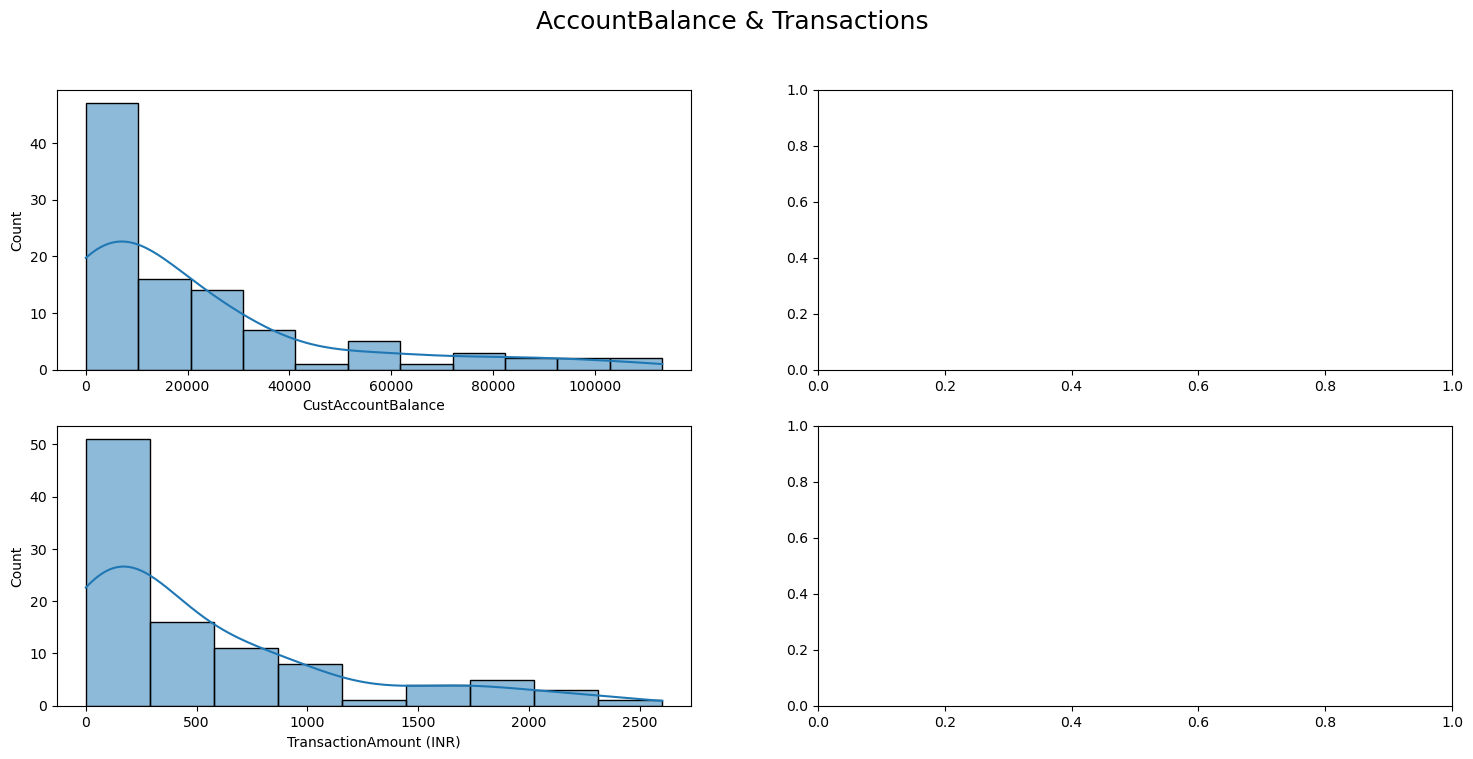

In [39]:
fig, ax = plt.subplots(2, 2, figsize = (18,8))

plt.suptitle('AccountBalance & Transactions', size = 18)

ax[0,0] = sns.histplot(df[0:100], x='CustAccountBalance', ax=ax[0,0], kde = True)
ax[1,0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,0], kde = True)
ax[0,1] = sns.boxplot(df[0:100], x='CustAccountBalance', ax=ax[0,1], orient = 'h')
ax[1,1] = sns.boxplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,1], orient = 'h')

# Show the figure
plt.show()

ValueError: Could not interpret value `TransactionAmount (INR)` for parameter `y`

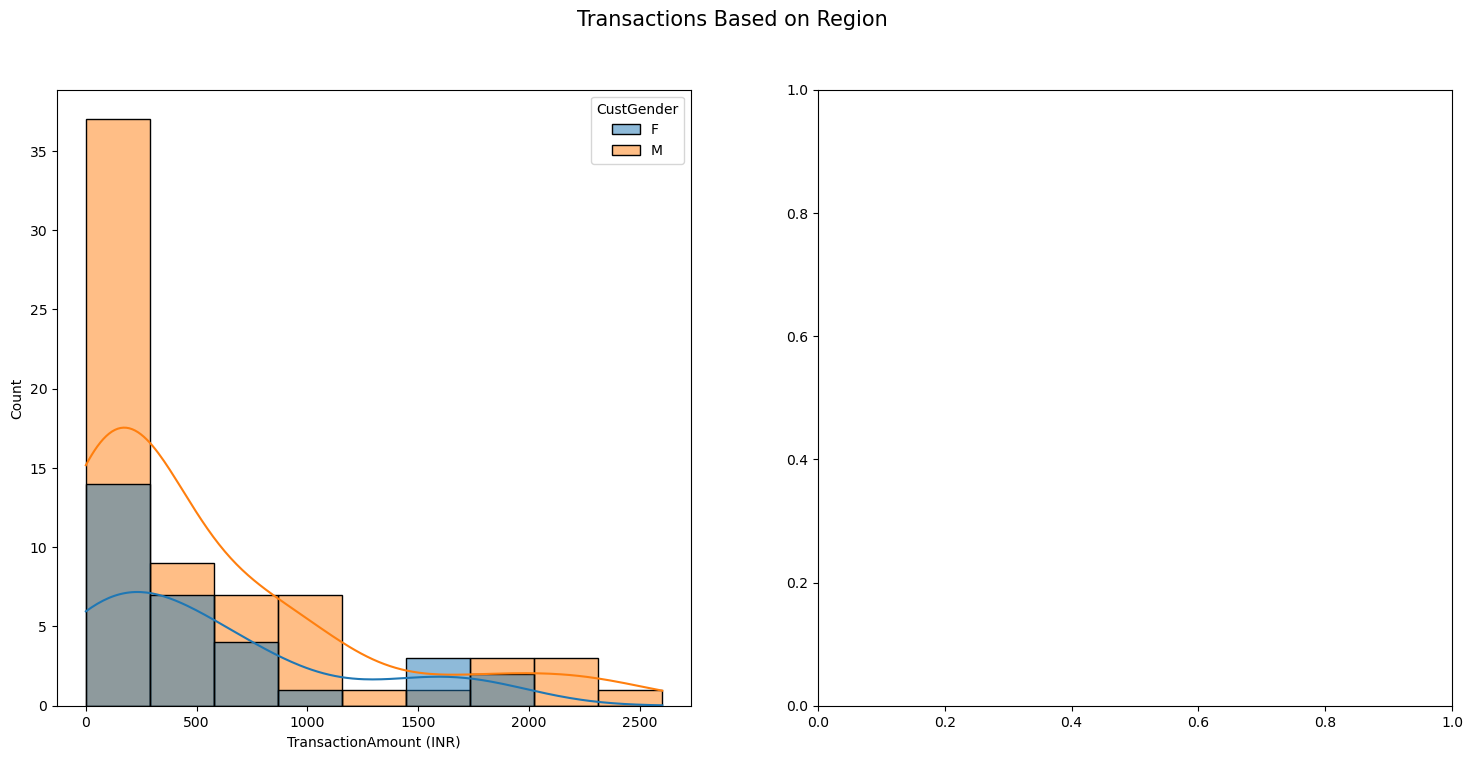

In [40]:
fig, ax = plt.subplots(1,2, figsize = (18,8))

plt.suptitle('Transactions Based on Region', size = 15)

ax[0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax = ax[0],kde = True, hue ='CustGender')
ax[1] = sns.scatterplot(df[0:100], x='age', y='TransactionAmount (INR)',ax = ax[1])
ax[1] = sns.regplot(df[0:100], x='age', y='TransactionAmount (INR)',ax = ax[1])

plt.show()

In [53]:
df2 = df.copy()
df2.set_index('TransactionDate', inplace=True)
daily_total = df2.groupby(pd.Grouper(freq='W'))['TransactionAmount (INR)'].sum()

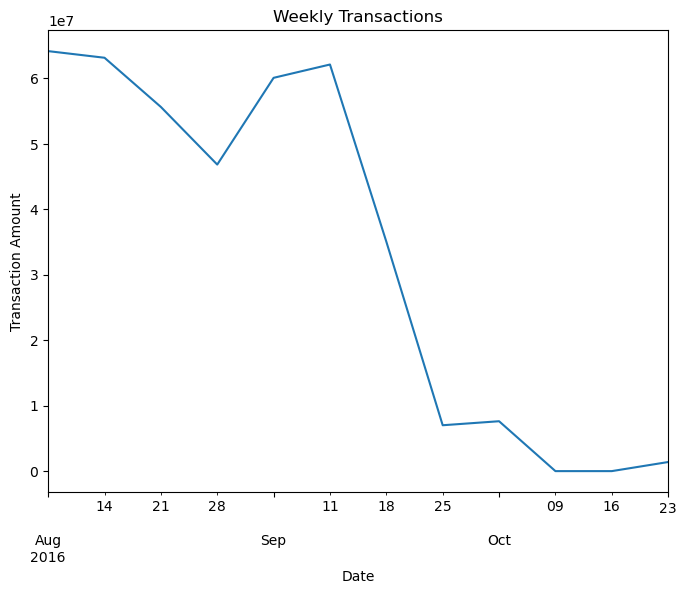

In [54]:
fig = plt.subplots(figsize = (8, 6))

daily_total.plot()

plt.title('Weekly Transactions')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

In [55]:
df2 = df.copy()

In [56]:
from sklearn.preprocessing import StandardScaler

colnames = df2.columns 
num_columns = df2.select_dtypes(include=['float', 'int']).columns 
df2[num_columns] = StandardScaler().fit_transform(df2[num_columns])

In [57]:
X = df[['CustAccountBalance', 'TransactionAmount (INR)']]

In [58]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

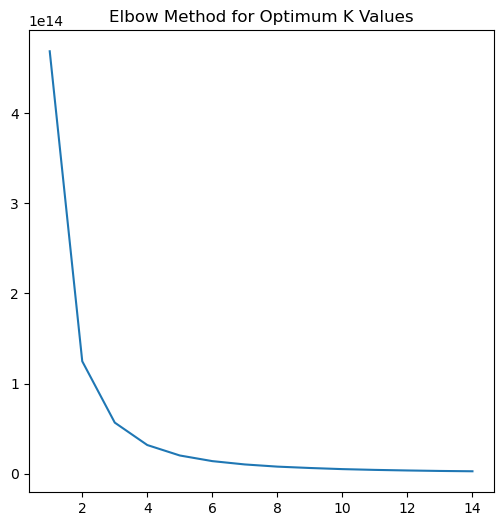

In [59]:
fig, ax = plt.subplots(figsize = (6,6))
    
plt.plot(range(1,15), wcss)

plt.title('Elbow Method for Optimum K Values')

plt.show()

Optimum k was k = 3

In [60]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

X['cluster'] = y_kmeans

In [61]:
X1 = X[X['cluster'] == 0]
X2 = X[X['cluster'] == 1]
X3 = X[X['cluster'] == 2]

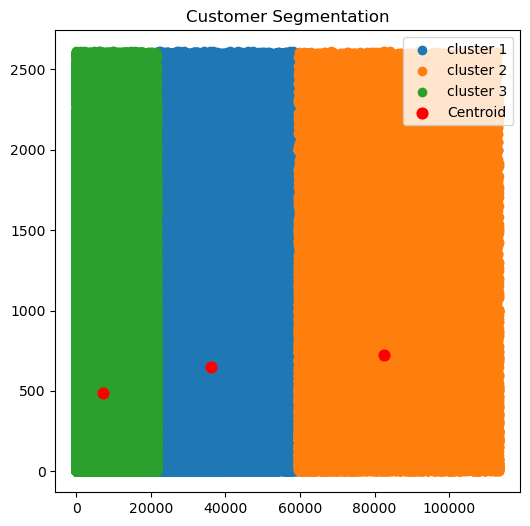

In [62]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Customer Segmentation")

plt.scatter(X1.iloc[:,0], X1.iloc[:, 1], label = 'cluster 1')
plt.scatter(X2.iloc[:,0], X2.iloc[:, 1], label = 'cluster 2')
plt.scatter(X3.iloc[:,0], X3.iloc[:, 1], label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
           label = 'Centroid', s= 60)

plt.legend()
plt.show()

In [63]:
df['Cluster'] = X['cluster']

In [64]:
clust_count = df['Cluster'].value_counts()

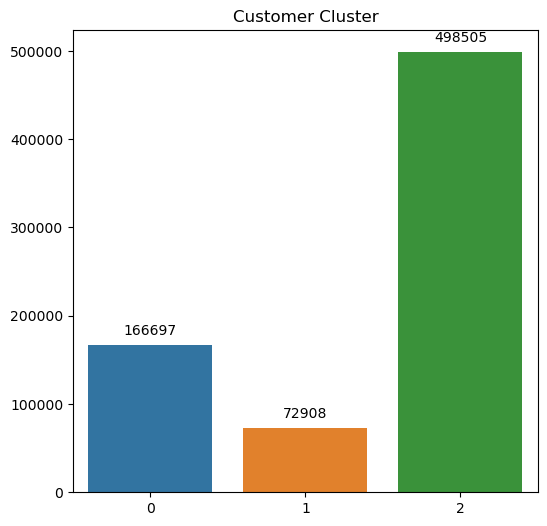

In [65]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Customer Cluster")

ax = sns.barplot(x = clust_count.index, y = clust_count.values)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [66]:
clust1 = df[df['Cluster'] == 0]
clust2 = df[df['Cluster'] == 1]
clust3 = df[df['Cluster'] == 2]

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

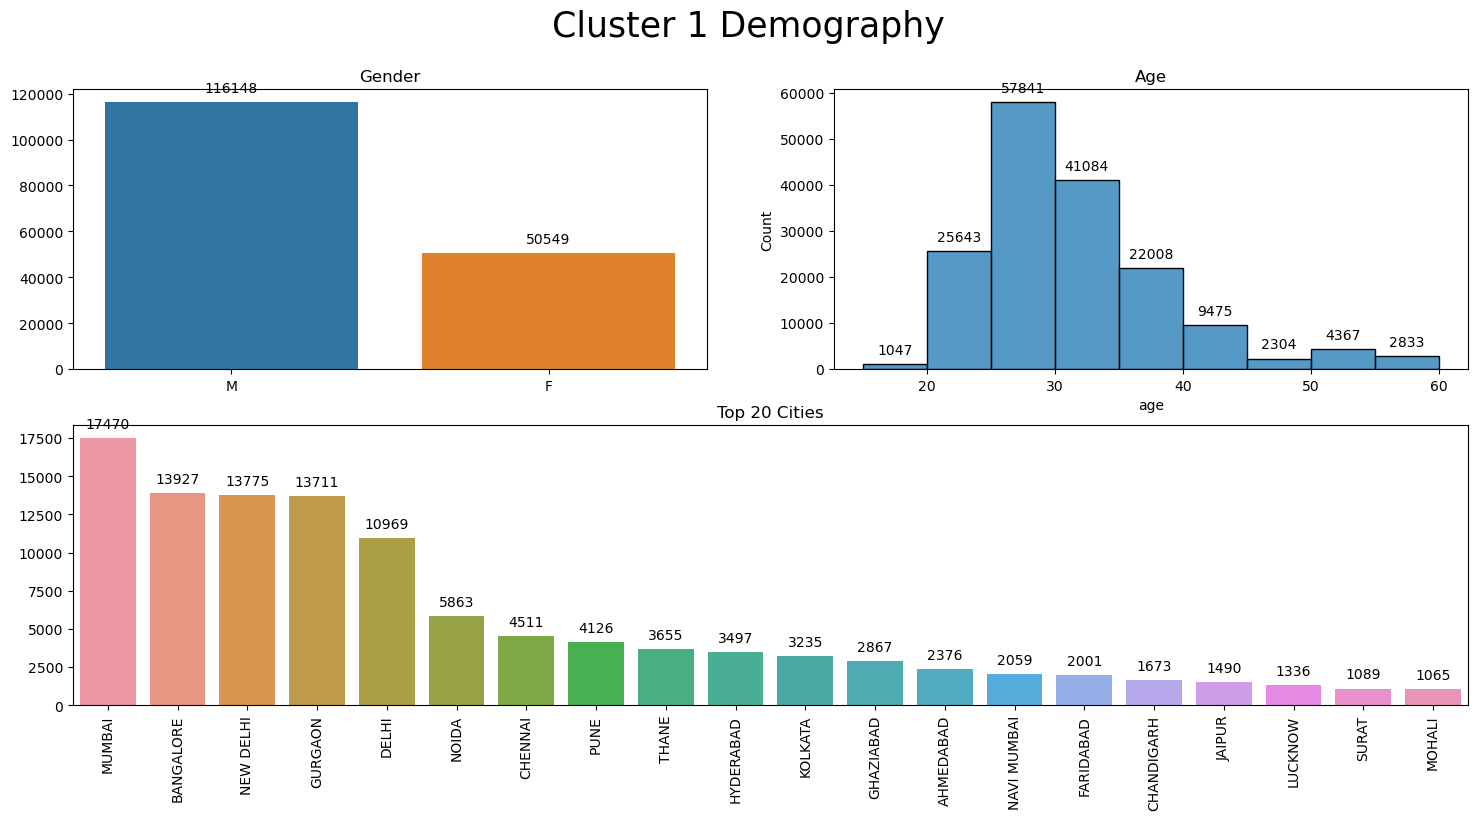

In [67]:
# identify cluster1
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 1 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust1['CustGender'].value_counts().index, y = clust1['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust1['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust1['CustLocation'].value_counts()[0:20].index, y = clust1['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

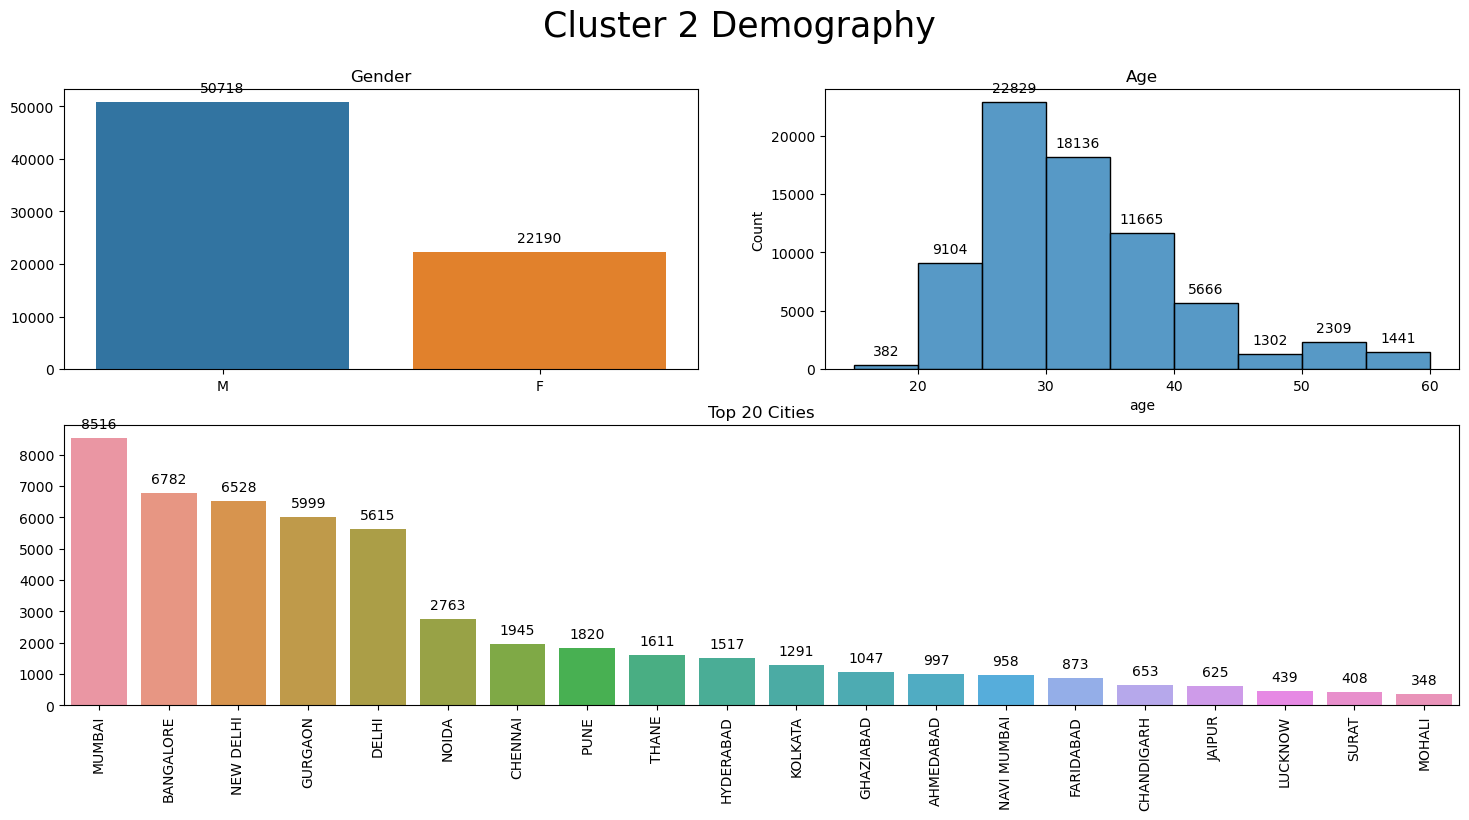

In [68]:
# identify cluster2
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 2 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust2['CustGender'].value_counts().index, y = clust2['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust2['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust2['CustLocation'].value_counts()[0:20].index, y = clust2['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

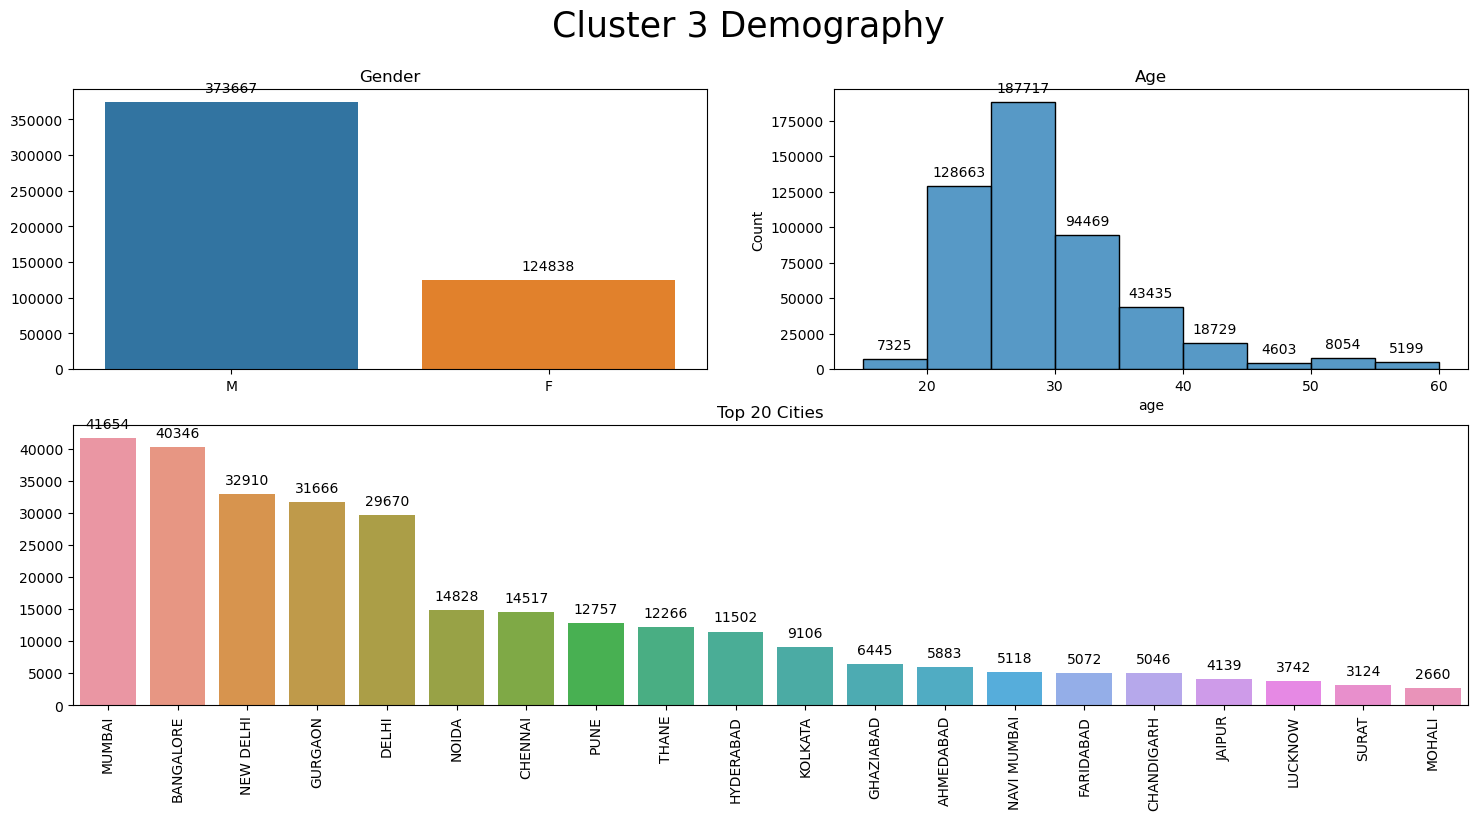

In [69]:
# identify cluster3
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 3 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust3['CustGender'].value_counts().index, y = clust3['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust3['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust3['CustLocation'].value_counts()[0:20].index, y = clust3['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)